In [ ]:
# --- Bước 1: Tiền xử lý dữ liệu (Preprocessing) ---
# Gắn Google Drive để lấy dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.1 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.1 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/11.1 MB 7.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.1 MB 13.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.1 MB 21.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.8/11.1 MB 26.2 MB/s eta 0:00:01
   ----------------------------------- ---- 9.9/11.1 MB 28.9 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 40.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install python-weka-wrapper3

     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     --------------------------------------- 0.0/15.9 MB 330.3 kB/s eta 0:00:49
     --------------------------------------- 0.1/15.9 MB 525.1 kB/s eta 0:00:31
     ---------------------------------------- 0.2/15.9 MB 1.1 MB/s eta 0:00:14
     - -------------------------------------- 0.5/15.9 MB 2.7 MB/s eta 0:00:06
     -- ------------------------------------- 1.1/15.9 MB 5.1 MB/s eta 0:00:03
     ----- ---------------------------------- 2.1/15.9 MB 8.3 MB/s eta 0:00:02
     ----- ---------------------------------- 2.1/15.9 MB 8.3 MB/s eta 0:00:02
     ----- ---------------------------------- 2.1/15.9 MB 8.3 MB/s eta 0:00:02
     ----- ---------------------------------- 2.1/15.9 MB 8.3 MB/s eta 0:00:02
     ----- ---------------------------------- 2.1/15.9 MB 8.3 MB/s eta 0:00:02
     ---------- ----------------------------- 4.4/15.9 MB 8.7 MB/s eta 0:00:02
     ------------- -------------------------- 5.2/15.9 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:

#basic lib
import pandas as pd
import numpy as np

#visual lib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

#model lib
from scipy.io import arff
import os
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import (accuracy_score, f1_score, average_precision_score,
                           confusion_matrix, precision_score, recall_score,
                           roc_auc_score, classification_report, roc_curve, auc)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Thêm thư viện cho Weka
import weka.core.jvm as jvm
from weka.core.converters import Loader, Saver
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random
from weka.filters import Filter
from weka.clusterers import Clusterer
import weka.core.typeconv as typeconv

In [2]:
print("Đọc dữ liệu từ các file CSV...")
data_X = pd.read_csv("data_X.csv")  # Dữ liệu các thuộc tính đầu vào
data_Y = pd.read_csv("data_Y.csv")  # Dữ liệu nhãn quality

Đọc dữ liệu từ các file CSV...


In [3]:
# Hiển thị thông tin cơ bản của dữ liệu
print("\nThông tin cơ bản của bộ dữ liệu X:")
print(f"Kích thước: {data_X.shape}")
print(data_X.info())


Thông tin cơ bản của bộ dữ liệu X:
Kích thước: (2103841, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103841 entries, 0 to 2103840
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date_time   object 
 1   T_data_1_1  int64  
 2   T_data_1_2  int64  
 3   T_data_1_3  int64  
 4   T_data_2_1  int64  
 5   T_data_2_2  int64  
 6   T_data_2_3  int64  
 7   T_data_3_1  int64  
 8   T_data_3_2  int64  
 9   T_data_3_3  int64  
 10  T_data_4_1  int64  
 11  T_data_4_2  int64  
 12  T_data_4_3  int64  
 13  T_data_5_1  int64  
 14  T_data_5_2  int64  
 15  T_data_5_3  int64  
 16  H_data      float64
 17  AH_data     float64
dtypes: float64(2), int64(15), object(1)
memory usage: 288.9+ MB
None


In [4]:
print("\nThông tin cơ bản của bộ dữ liệu Y:")
print(f"Kích thước: {data_Y.shape}")
print(data_Y.info())


Thông tin cơ bản của bộ dữ liệu Y:
Kích thước: (29184, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29184 entries, 0 to 29183
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  29184 non-null  object
 1   quality    29184 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 456.1+ KB
None


In [5]:
df=pd.merge(
    left = data_X,
    right = data_Y,
    on = 'date_time',
    how='inner'
)
df

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,2015-01-04 00:05:00,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
1,2015-01-04 01:05:00,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2,2015-01-04 02:05:00,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
3,2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,2015-01-04 04:05:00,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,2018-05-03 19:05:00,257,258,266,379,381,358,449,386,461,354,350,349,234,254,252,157.47,7.33,438
29180,2018-05-03 20:05:00,259,255,260,372,367,362,431,461,453,360,344,348,235,253,247,157.17,7.87,452
29181,2018-05-03 21:05:00,260,254,263,364,349,352,429,425,446,348,360,345,256,257,247,155.00,7.65,455
29182,2018-05-03 22:05:00,255,255,260,356,352,354,438,468,441,347,357,344,254,265,248,153.89,8.90,455


In [6]:
print("\nKích thước dữ liệu sau khi ghép:", df.shape)
print("Năm dòng đầu tiên của dữ liệu đã ghép:")
print(df.head())


Kích thước dữ liệu sau khi ghép: (29184, 19)
Năm dòng đầu tiên của dữ liệu đã ghép:
             date_time  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0  2015-01-04 00:05:00         277         326         273         322   
1  2015-01-04 01:05:00         277         253         272         320   
2  2015-01-04 02:05:00         262         218         260         326   
3  2015-01-04 03:05:00         243         238         252         327   
4  2015-01-04 04:05:00         236         238         245         323   

   T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  \
0         335         352         505         501         670         326   
1         333         355         500         501         687         337   
2         336         330         505         499         443         347   
3         329         308         520         498         540         342   
4         320         318         522         501         524         343   

   T_da

### STEP 1: Data Preprocessing





In [7]:
# Đọc dữ liệu từ các file CSV
print("Đọc dữ liệu từ các file CSV...")
data_X = pd.read_csv("data_X.csv")  # Dữ liệu các thuộc tính đầu vào
data_Y = pd.read_csv("data_Y.csv")  # Dữ liệu nhãn quality

# Hiển thị thông tin cơ bản của dữ liệu
print("\nThông tin cơ bản của bộ dữ liệu X:")
print(f"Kích thước: {data_X.shape}")
print(data_X.info())

print("\nThông tin cơ bản của bộ dữ liệu Y:")
print(f"Kích thước: {data_Y.shape}")
print(data_Y.info())

# Hiển thị một số dòng đầu tiên của dữ liệu
print("\nNăm dòng đầu tiên của data_X:")
print(data_X.head())

print("\nNăm dòng đầu tiên của data_Y:")
print(data_Y.head())

# Kiểm tra giá trị thiếu
print("\nKiểm tra giá trị thiếu trong data_X:")
print(data_X.isnull().sum())

print("\nKiểm tra giá trị thiếu trong data_Y:")
print(data_Y.isnull().sum())

# Ghép dữ liệu X và Y dựa vào cột date_time
print("\nGhép dữ liệu X và Y dựa vào cột date_time...")
df = pd.merge(
    left=data_X,
    right=data_Y,
    on='date_time',
    how='inner'
)

print("\nKích thước dữ liệu sau khi ghép:", df.shape)
print("Năm dòng đầu tiên của dữ liệu đã ghép:")
print(df.head())

Đọc dữ liệu từ các file CSV...

Thông tin cơ bản của bộ dữ liệu X:
Kích thước: (2103841, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103841 entries, 0 to 2103840
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date_time   object 
 1   T_data_1_1  int64  
 2   T_data_1_2  int64  
 3   T_data_1_3  int64  
 4   T_data_2_1  int64  
 5   T_data_2_2  int64  
 6   T_data_2_3  int64  
 7   T_data_3_1  int64  
 8   T_data_3_2  int64  
 9   T_data_3_3  int64  
 10  T_data_4_1  int64  
 11  T_data_4_2  int64  
 12  T_data_4_3  int64  
 13  T_data_5_1  int64  
 14  T_data_5_2  int64  
 15  T_data_5_3  int64  
 16  H_data      float64
 17  AH_data     float64
dtypes: float64(2), int64(15), object(1)
memory usage: 288.9+ MB
None

Thông tin cơ bản của bộ dữ liệu Y:
Kích thước: (29184, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29184 entries, 0 to 29183
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --


Loại bỏ cột date_time vì không cần thiết cho mô hình

Thống kê mô tả của dữ liệu:
         T_data_1_1    T_data_1_2    T_data_1_3    T_data_2_1    T_data_2_2  \
count  29184.000000  29184.000000  29184.000000  29184.000000  29184.000000   
mean     250.034265    249.814179    250.152584    349.803008    349.717893   
std       32.350350     30.453885     30.635287     43.752481     41.414882   
min     -193.000000   -120.000000    -96.000000   -703.000000   -914.000000   
25%      228.000000    228.000000    229.000000    328.000000    328.000000   
50%      250.000000    250.000000    250.000000    350.000000    350.000000   
75%      272.000000    271.000000    272.000000    372.000000    372.000000   
max      722.000000    564.000000    643.000000   1299.000000   1178.000000   

         T_data_2_3    T_data_3_1    T_data_3_2    T_data_3_3    T_data_4_1  \
count  29184.000000  29184.000000  29184.000000  29184.000000  29184.000000   
mean     349.951377    501.162932    500.918037

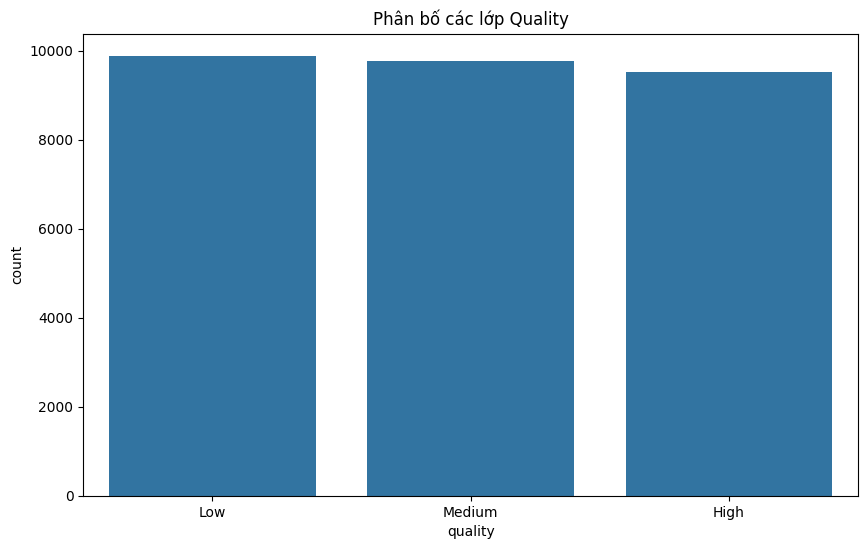

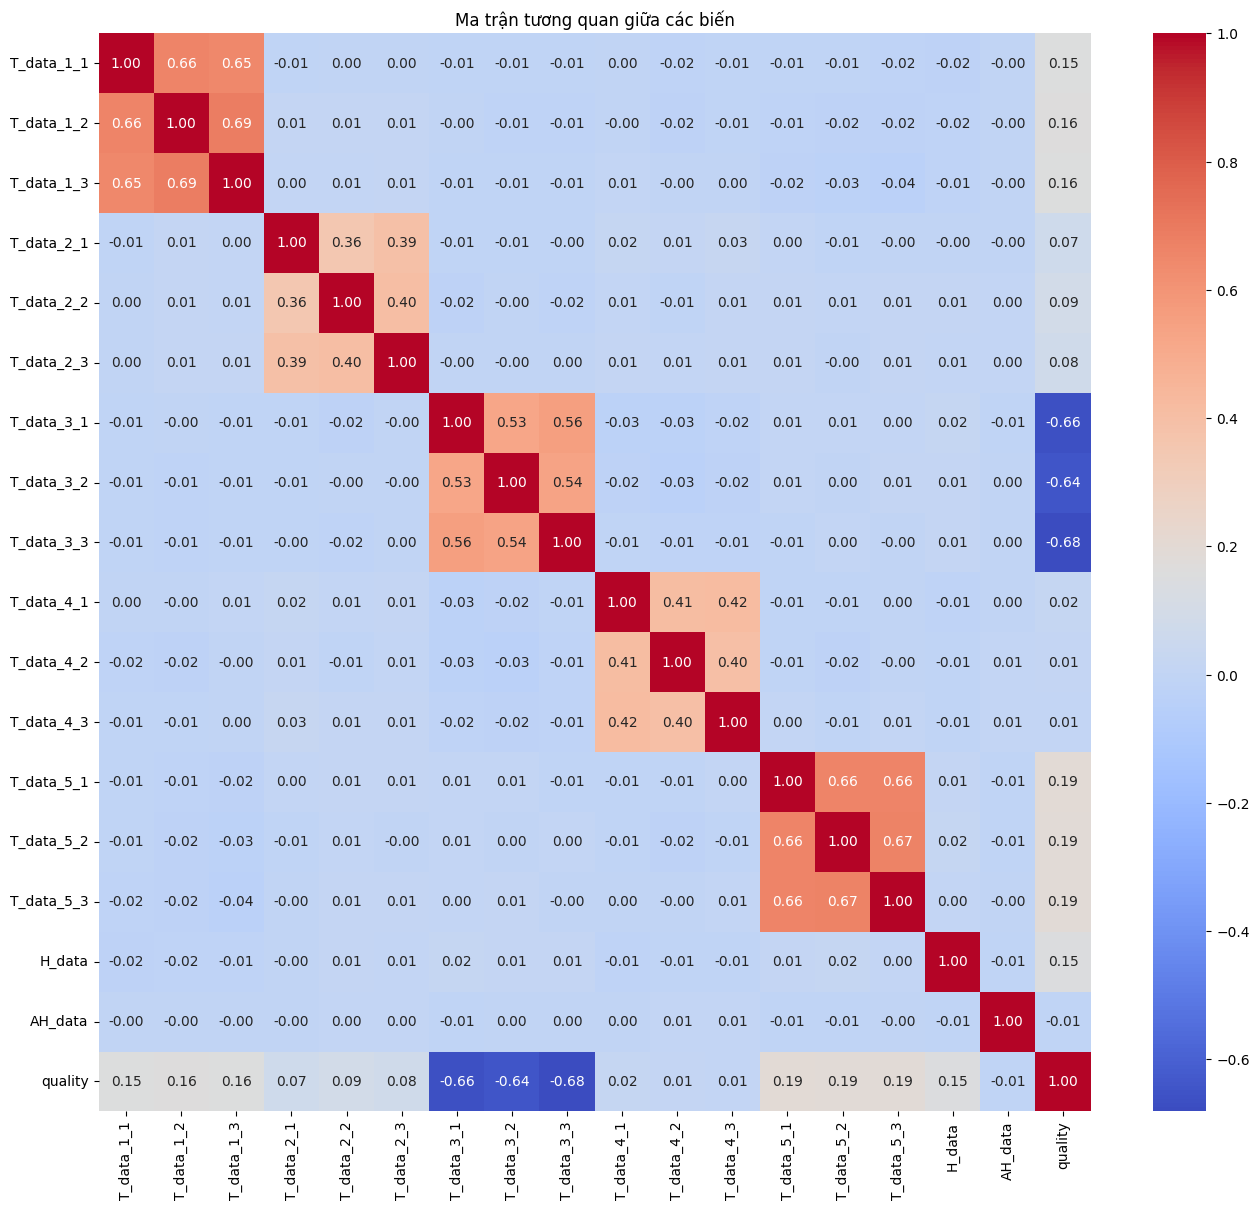


Chia dữ liệu thành tập huấn luyện và kiểm tra...

Kích thước tập huấn luyện: (23347, 17)
Kích thước tập kiểm tra: (5837, 17)

Mã hóa nhãn...


In [8]:
# Loại bỏ cột date_time vì không cần thiết cho mô hình
print("\nLoại bỏ cột date_time vì không cần thiết cho mô hình")
df = df.drop(columns=['date_time'])

# Phân tích thống kê mô tả của dữ liệu
print("\nThống kê mô tả của dữ liệu:")
print(df.describe())

# Chuẩn hóa đặc trưng với StandardScaler
print("\nChuẩn hóa đặc trưng...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('quality', axis=1))

# Tạo DataFrame X và y
print("\nTạo DataFrame X và y...")
X = pd.DataFrame(X_scaled, columns=df.columns[:-1])
y = df['quality']

# Biến mục tiêu là liên tục (regression), chuyển thành phân loại (classification)
print("\nBiến mục tiêu là liên tục (regression), chuyển thành phân loại (classification)")
print("Phân loại chất lượng thành 3 nhóm: Low, Medium, High")
y_cat = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

# Trực quan hóa phân bố của các lớp sau khi phân loại
plt.figure(figsize=(10, 6))
sns.countplot(x=y_cat)
plt.title("Phân bố các lớp Quality")
plt.savefig("quality_classes_distribution.png")
plt.show()

# Trực quan hóa mối tương quan giữa các biến
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các biến")
plt.savefig("correlation_matrix.png")
plt.show()

# Chia dữ liệu thành tập huấn luyện và kiểm tra
print("\nChia dữ liệu thành tập huấn luyện và kiểm tra...")
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

print(f"\nKích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

# Mã hóa nhãn để sử dụng trong đánh giá
print("\nMã hóa nhãn...")
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### STEP 2: Classification/Prediction using Weka


=========== BƯỚC 2: PHÂN LOẠI/DỰ ĐOÁN SỬ DỤNG WEKA ===========
Tạo file CSV tạm để chuyển sang ARFF...
Chuyển đổi CSV sang ARFF...


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\arpack_combined.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\core.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\mtj.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled



Khởi động JVM để sử dụng Weka...
Tải dữ liệu từ file ARFF...

===== THUẬT TOÁN 1: Random Forest =====
Đánh giá mô hình Random Forest...

Kết quả đánh giá Random Forest:

Correctly Classified Instances        4953               84.8552 %
Incorrectly Classified Instances       884               15.1448 %
Kappa statistic                          0.7728
Mean absolute error                      0.1628
Root mean squared error                  0.2684
Relative absolute error                 36.6443 %
Root relative squared error             56.9419 %
Total Number of Instances             5837     

Accuracy: 84.86%
F1 Score: 0.8481
Precision: 0.8479
Recall: 0.8486

Tạo ma trận nhầm lẫn cho Random Forest...


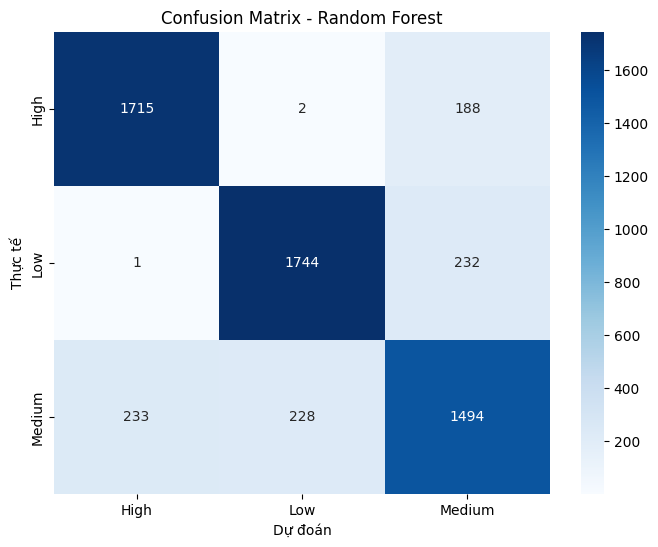

In [9]:
print("\n=========== BƯỚC 2: PHÂN LOẠI/DỰ ĐOÁN SỬ DỤNG WEKA ===========")

# Tạo file CSV tạm để chuyển sang ARFF
print("Tạo file CSV tạm để chuyển sang ARFF...")
train_temp = X_train.copy()
train_temp['class'] = y_train
test_temp = X_test.copy()
test_temp['class'] = y_test

train_temp.to_csv("train_temp.csv", index=False)
test_temp.to_csv("test_temp.csv", index=False)

# Hàm chuyển CSV sang ARFF
def csv_to_arff(csv_filename, arff_filename):
    df_temp = pd.read_csv(csv_filename)
    num_rows, num_cols = df_temp.shape

    with open(arff_filename, 'w') as f:
        f.write("@relation quality_classification\n\n")

        for col in df_temp.columns:
            if col != 'class':
                f.write(f"@attribute {col} REAL\n")
            else:
                unique_classes = df_temp['class'].unique()
                f.write(f"@attribute {col} {{{', '.join(map(str, unique_classes))}}}\n")

        f.write("\n@data\n")
        for i in range(num_rows):
            f.write(','.join(map(str, df_temp.iloc[i].values)) + '\n')

# Tạo file .arff
print("Chuyển đổi CSV sang ARFF...")
csv_to_arff("train_temp.csv", "train.arff")
csv_to_arff("test_temp.csv", "test.arff")

# Khởi động JVM để sử dụng Weka
print("\nKhởi động JVM để sử dụng Weka...")
jvm.start(packages=True)

# Tải dữ liệu từ file ARFF
print("Tải dữ liệu từ file ARFF...")
loader = Loader(classname="weka.core.converters.ArffLoader")
train_data = loader.load_file("train.arff")
test_data = loader.load_file("test.arff")

# Thiết lập lớp index
train_data.class_is_last()
test_data.class_is_last()

# ===== THUẬT TOÁN 1: Random Forest =====
print("\n===== THUẬT TOÁN 1: Random Forest =====")
rf = Classifier(classname="weka.classifiers.trees.RandomForest")
rf.options = ["-I", "100", "-K", "0", "-depth", "0"]
rf.build_classifier(train_data)

# Đánh giá mô hình Random Forest
print("Đánh giá mô hình Random Forest...")
evaluation_rf = Evaluation(train_data)
evaluation_rf.test_model(rf, test_data)

print("\nKết quả đánh giá Random Forest:")
print(evaluation_rf.summary())
print(f"Accuracy: {evaluation_rf.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_rf.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_rf.weighted_precision:.4f}")
print(f"Recall: {evaluation_rf.weighted_recall:.4f}")

# Lưu biểu đồ ma trận nhầm lẫn cho Random Forest
print("\nTạo ma trận nhầm lẫn cho Random Forest...")
rf_predictions = []
for instance in test_data:
    pred = rf.classify_instance(instance)
    rf_predictions.append(pred)

cm_rf = confusion_matrix(y_test_encoded, [int(pred) for pred in rf_predictions])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix - Random Forest')
plt.savefig("rf_confusion_matrix.png")
plt.show()

### STEP 3: Another Algorithm or Improvement


===== THUẬT TOÁN 2: Naive Bayes =====
Đánh giá mô hình Naive Bayes...

Kết quả đánh giá Naive Bayes:

Correctly Classified Instances        4516               77.3685 %
Incorrectly Classified Instances      1321               22.6315 %
Kappa statistic                          0.6605
Mean absolute error                      0.2209
Root mean squared error                  0.3314
Relative absolute error                 49.7064 %
Root relative squared error             70.313  %
Total Number of Instances             5837     

Accuracy: 77.37%
F1 Score: 0.7740
Precision: 0.7745
Recall: 0.7737

Tạo ma trận nhầm lẫn cho Naive Bayes...


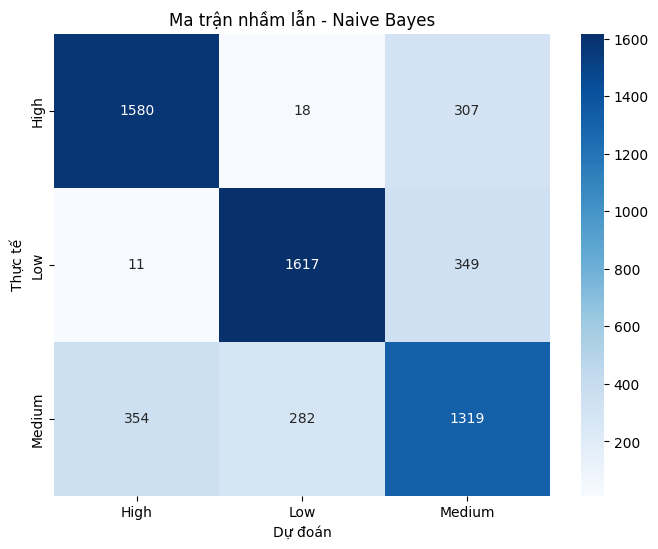

In [22]:
# Gán class attribute
train_data.class_is_last()
test_data.class_is_last()

print("\n===== THUẬT TOÁN 2: Naive Bayes =====")
nb = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
nb.build_classifier(train_data)

# Đánh giá mô hình Naive Bayes
print("Đánh giá mô hình Naive Bayes...")
evaluation_nb = Evaluation(train_data)
evaluation_nb.test_model(nb, test_data)

print("\nKết quả đánh giá Naive Bayes:")
print(evaluation_nb.summary())
print(f"Accuracy: {evaluation_nb.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_nb.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_nb.weighted_precision:.4f}")
print(f"Recall: {evaluation_nb.weighted_recall:.4f}")

# Ma trận nhầm lẫn
print("\nTạo ma trận nhầm lẫn cho Naive Bayes...")

# Lấy dự đoán dưới dạng tên lớp
nb_predictions_labels = [test_data.class_attribute.value(int(nb.classify_instance(instance)))
                         for instance in test_data]

# Encode nhãn nếu y_test_encoded là số
nb_predictions_encoded = label_encoder.transform(nb_predictions_labels)

cm_nb = confusion_matrix(y_test_encoded, nb_predictions_encoded)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn - Naive Bayes')
plt.savefig("nb_confusion_matrix.png")
plt.show()


In [ ]:
# ===== CẢI THIỆN 1: Kết hợp với Clustering =====
print("\n===== CẢI THIỆN 1: Kết hợp với Clustering =====")

# Thực hiện K-means clustering
print("Thực hiện K-means clustering...")
clusterer = Clusterer(classname="weka.clusterers.SimpleKMeans")
clusterer.options = ["-N", "3", "-S", "42"]

# Tạo đặc trưng mới từ clustering
filter_clusterer = Filter(classname="weka.filters.unsupervised.attribute.AddCluster")
filter_clusterer.options = ["-W", "weka.clusterers.SimpleKMeans -N 3 -S 42"]
filter_clusterer.inputformat(train_data)
train_data_clustered = filter_clusterer.filter(train_data)
test_data_clustered = filter_clusterer.filter(test_data)

# Huấn luyện Random Forest với đặc trưng clustering
print("Huấn luyện Random Forest với đặc trưng clustering...")
rf_clustered = Classifier(classname="weka.classifiers.trees.RandomForest")
rf_clustered.options = ["-I", "100", "-K", "0", "-depth", "0"]
rf_clustered.build_classifier(train_data_clustered)

# Đánh giá mô hình Random Forest với clustering
print("Đánh giá mô hình Random Forest với clustering...")
evaluation_rf_clustered = Evaluation(train_data_clustered)
evaluation_rf_clustered.test_model(rf_clustered, test_data_clustered)

print("\nKết quả đánh giá Random Forest với clustering:")
print(evaluation_rf_clustered.summary())
print(f"Accuracy: {evaluation_rf_clustered.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_rf_clustered.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_rf_clustered.weighted_precision:.4f}")
print(f"Recall: {evaluation_rf_clustered.weighted_recall:.4f}")



===== CẢI THIỆN 1: Kết hợp với Clustering =====
Thực hiện K-means clustering...
Huấn luyện Random Forest với đặc trưng clustering...
Đánh giá mô hình Random Forest với clustering...

Kết quả đánh giá Random Forest với clustering:

Correctly Classified Instances        4991               85.5063 %
Incorrectly Classified Instances       846               14.4937 %
Kappa statistic                          0.7826
Mean absolute error                      0.1621
Root mean squared error                  0.267 
Relative absolute error                 36.4728 %
Root relative squared error             56.6533 %
Total Number of Instances             5837     

Accuracy: 85.51%
F1 Score: 0.8547
Precision: 0.8544
Recall: 0.8551


In [ ]:
# ===== CẢI THIỆN 2: Meta-Classifier (AdaBoost) =====
print("\n===== CẢI THIỆN 2: Meta-Classifier (AdaBoost) =====")
meta = Classifier(classname="weka.classifiers.meta.AdaBoostM1")
meta.options = ["-W", "weka.classifiers.trees.J48", "-I", "10"]
meta.build_classifier(train_data)

# Đánh giá mô hình AdaBoost
print("Đánh giá mô hình AdaBoost...")
evaluation_meta = Evaluation(train_data)
evaluation_meta.test_model(meta, test_data)

print("\nKết quả đánh giá AdaBoost:")
print(evaluation_meta.summary())
print(f"Accuracy: {evaluation_meta.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_meta.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_meta.weighted_precision:.4f}")
print(f"Recall: {evaluation_meta.weighted_recall:.4f}")

# Lưu biểu đồ ma trận nhầm lẫn cho AdaBoost
print("\nTạo ma trận nhầm lẫn cho AdaBoost...")
meta_predictions = []
for instance in test_data:
    pred = meta.classify_instance(instance)
    meta_predictions.append(pred)

cm_meta = confusion_matrix(y_test_encoded, [int(pred) for pred in meta_predictions])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn - AdaBoost')
plt.savefig("adaboost_confusion_matrix.png")
plt.close()



===== CẢI THIỆN 2: Meta-Classifier (AdaBoost) =====
Đánh giá mô hình AdaBoost...

Kết quả đánh giá AdaBoost:

Correctly Classified Instances        4797               82.1826 %
Incorrectly Classified Instances      1040               17.8174 %
Kappa statistic                          0.7327
Mean absolute error                      0.1181
Root mean squared error                  0.3294
Relative absolute error                 26.5815 %
Root relative squared error             69.8787 %
Total Number of Instances             5837     

Accuracy: 82.18%
F1 Score: 0.8216
Precision: 0.8215
Recall: 0.8218

Tạo ma trận nhầm lẫn cho AdaBoost...


### STEP 4: Model Evaluation and Report

In [13]:
print("Đánh giá cross-validation 10 fold cho Random Forest...")
evaluation_cv_rf = Evaluation(train_data)
evaluation_cv_rf.crossvalidate_model(rf, train_data, 10, Random(42))

print("\nKết quả đánh giá 10-fold CV cho Random Forest:")
print(f"Accuracy: {evaluation_cv_rf.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_cv_rf.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_cv_rf.weighted_precision:.4f}")
print(f"Recall: {evaluation_cv_rf.weighted_recall:.4f}")

# Đánh giá cross-validation với 10 fold cho Naive Bayes
print("\nĐánh giá cross-validation 10 fold cho Naive Bayes...")
evaluation_cv_nb = Evaluation(train_data)
evaluation_cv_nb.crossvalidate_model(nb, train_data, 10, Random(42))

print("\nKết quả đánh giá 10-fold CV cho Naive Bayes:")
print(f"Accuracy: {evaluation_cv_nb.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_cv_nb.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_cv_nb.weighted_precision:.4f}")
print(f"Recall: {evaluation_cv_nb.weighted_recall:.4f}")

Đánh giá cross-validation 10 fold cho Random Forest...

Kết quả đánh giá 10-fold CV cho Random Forest:
Accuracy: 85.34%
F1 Score: 0.8536
Precision: 0.8539
Recall: 0.8534

Đánh giá cross-validation 10 fold cho Naive Bayes...

Kết quả đánh giá 10-fold CV cho Naive Bayes:
Accuracy: 77.73%
F1 Score: 0.7782
Precision: 0.7794
Recall: 0.7773


In [14]:
# Đánh giá cross-validation với 10 fold cho Random Forest với clustering
print("\nĐánh giá cross-validation 10 fold cho Random Forest với clustering...")
evaluation_cv_rf_clustered = Evaluation(train_data_clustered)
evaluation_cv_rf_clustered.crossvalidate_model(rf_clustered, train_data_clustered, 10, Random(42))

print("\nKết quả đánh giá 10-fold CV cho Random Forest với clustering:")
print(f"Accuracy: {evaluation_cv_rf_clustered.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_cv_rf_clustered.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_cv_rf_clustered.weighted_precision:.4f}")
print(f"Recall: {evaluation_cv_rf_clustered.weighted_recall:.4f}")

# Đánh giá cross-validation với 10 fold cho AdaBoost
print("\nĐánh giá cross-validation 10 fold cho AdaBoost...")
evaluation_cv_meta = Evaluation(train_data)
evaluation_cv_meta.crossvalidate_model(meta, train_data, 10, Random(42))

print("\nKết quả đánh giá 10-fold CV cho AdaBoost:")
print(f"Accuracy: {evaluation_cv_meta.percent_correct:.2f}%")
print(f"F1 Score: {evaluation_cv_meta.weighted_f_measure:.4f}")
print(f"Precision: {evaluation_cv_meta.weighted_precision:.4f}")
print(f"Recall: {evaluation_cv_meta.weighted_recall:.4f}")




Đánh giá cross-validation 10 fold cho Random Forest với clustering...

Kết quả đánh giá 10-fold CV cho Random Forest với clustering:
Accuracy: 85.62%
F1 Score: 0.8564
Precision: 0.8566
Recall: 0.8562

Đánh giá cross-validation 10 fold cho AdaBoost...

Kết quả đánh giá 10-fold CV cho AdaBoost:
Accuracy: 82.45%
F1 Score: 0.8249
Precision: 0.8253
Recall: 0.8245


In [15]:
# So sánh thời gian chạy của các mô hình
import time

print("\nSo sánh thời gian chạy của các mô hình:")

# Đo thời gian huấn luyện Random Forest
start_time = time.time()
rf.build_classifier(train_data)
rf_train_time = time.time() - start_time

# Đo thời gian dự đoán Random Forest
start_time = time.time()
for instance in test_data:
    rf.classify_instance(instance)
rf_predict_time = time.time() - start_time

# Đo thời gian huấn luyện Naive Bayes
start_time = time.time()
nb.build_classifier(train_data)
nb_train_time = time.time() - start_time

# Đo thời gian dự đoán Naive Bayes
start_time = time.time()
for instance in test_data:
    nb.classify_instance(instance)
nb_predict_time = time.time() - start_time

# Đo thời gian huấn luyện Random Forest với clustering
start_time = time.time()
rf_clustered.build_classifier(train_data_clustered)
rf_clustered_train_time = time.time() - start_time

# Đo thời gian dự đoán Random Forest với clustering
start_time = time.time()
for instance in test_data_clustered:
    rf_clustered.classify_instance(instance)
rf_clustered_predict_time = time.time() - start_time

# Đo thời gian huấn luyện AdaBoost
start_time = time.time()
meta.build_classifier(train_data)
meta_train_time = time.time() - start_time

# Đo thời gian dự đoán AdaBoost
start_time = time.time()
for instance in test_data:
    meta.classify_instance(instance)
meta_predict_time = time.time() - start_time


# In kết quả thời gian huấn luyện và dự đoán
print(f"\nThời gian huấn luyện Random Forest: {rf_train_time:.4f} giây")
print(f"Thời gian dự đoán Random Forest: {rf_predict_time:.4f} giây")

print(f"\nThời gian huấn luyện Naive Bayes: {nb_train_time:.4f} giây")
print(f"Thời gian dự đoán Naive Bayes: {nb_predict_time:.4f} giây")

print(f"\nThời gian huấn luyện Random Forest + Clustering: {rf_clustered_train_time:.4f} giây")
print(f"Thời gian dự đoán Random Forest + Clustering: {rf_clustered_predict_time:.4f} giây")

print(f"\nThời gian huấn luyện AdaBoost: {meta_train_time:.4f} giây")
print(f"Thời gian dự đoán AdaBoost: {meta_predict_time:.4f} giây")


So sánh thời gian chạy của các mô hình:

Thời gian huấn luyện Random Forest: 18.5605 giây
Thời gian dự đoán Random Forest: 1.3191 giây

Thời gian huấn luyện Naive Bayes: 0.0771 giây
Thời gian dự đoán Naive Bayes: 0.5170 giây

Thời gian huấn luyện Random Forest + Clustering: 16.9376 giây
Thời gian dự đoán Random Forest + Clustering: 1.0508 giây

Thời gian huấn luyện AdaBoost: 20.8469 giây
Thời gian dự đoán AdaBoost: 0.5964 giây


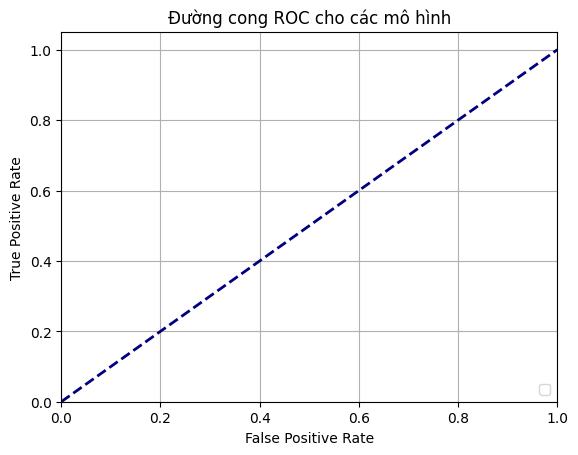

In [16]:
# Đường cơ sở
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC cho các mô hình')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve_comparison.png")
plt.show()



PART 5: VISUALIZATION

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
from subprocess import Popen, PIPE

# Replace 'model_file' with your actual J48 trained model file
process = Popen(["java", "weka.classifiers.trees.J48", "-l", "j48.model", "-print"], stdout=PIPE, stderr=PIPE)
stdout, stderr = process.communicate()

tree_text = stdout.decode("utf-8")
print(tree_text)


In [9]:
import weka.core.jvm as jvm
from weka.core.converters import Loader, Saver
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random
from weka.filters import Filter
from weka.clusterers import Clusterer
import weka.core.typeconv as typeconv


INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Loading ARFF data...
Training J48 model...

Evaluating J48 model...

Evaluation Results:
Correctly Classified Instances: 4617.0
Incorrectly Classified Instances: 1220.0
Accuracy: 79.0988521500771

Confusion Matrix:
[[1616.    6.  283.]
 [   6. 1693.  278.]
 [ 332.  315. 1308.]]

Decision Tree Structure:
J48 pruned tree
------------------

T_data_3_3 <= -0.053972
|   T_data_3_2 <= -0.540244
|   |   T_data_3_3 <= -0.7859
|   |   |   T_data_1_3 <= -0.755762
|   |   |   |   T_data_3_1 <= -1.011947
|   |   |   |   |   T_data_5_1 <= -1.1956
|   |   |   |   |   |   H_data <= -0.583882
|   |   |   |   |   |   |   T_data_5_2 <= -1.069607: Medium (11.0/1.0)
|   |   |   |   |   |   |   T_data_5_2 > -1.069607: High (5.0)
|   |   |   |   |   |   H_data > -0.583882
|   |   |   |   |   |   |   T_data_2_2 <= -1.03148: Medium (3.0)
|   |   |   |   |   |   |   T_data_2_2 > -1.03148
|   |   |   |   |   |   |   |   T_data_1_2 <= -1.274545
|   |   |   |   |   |   |   |   |   T_data_1_2 <= -1.373056
|   |  

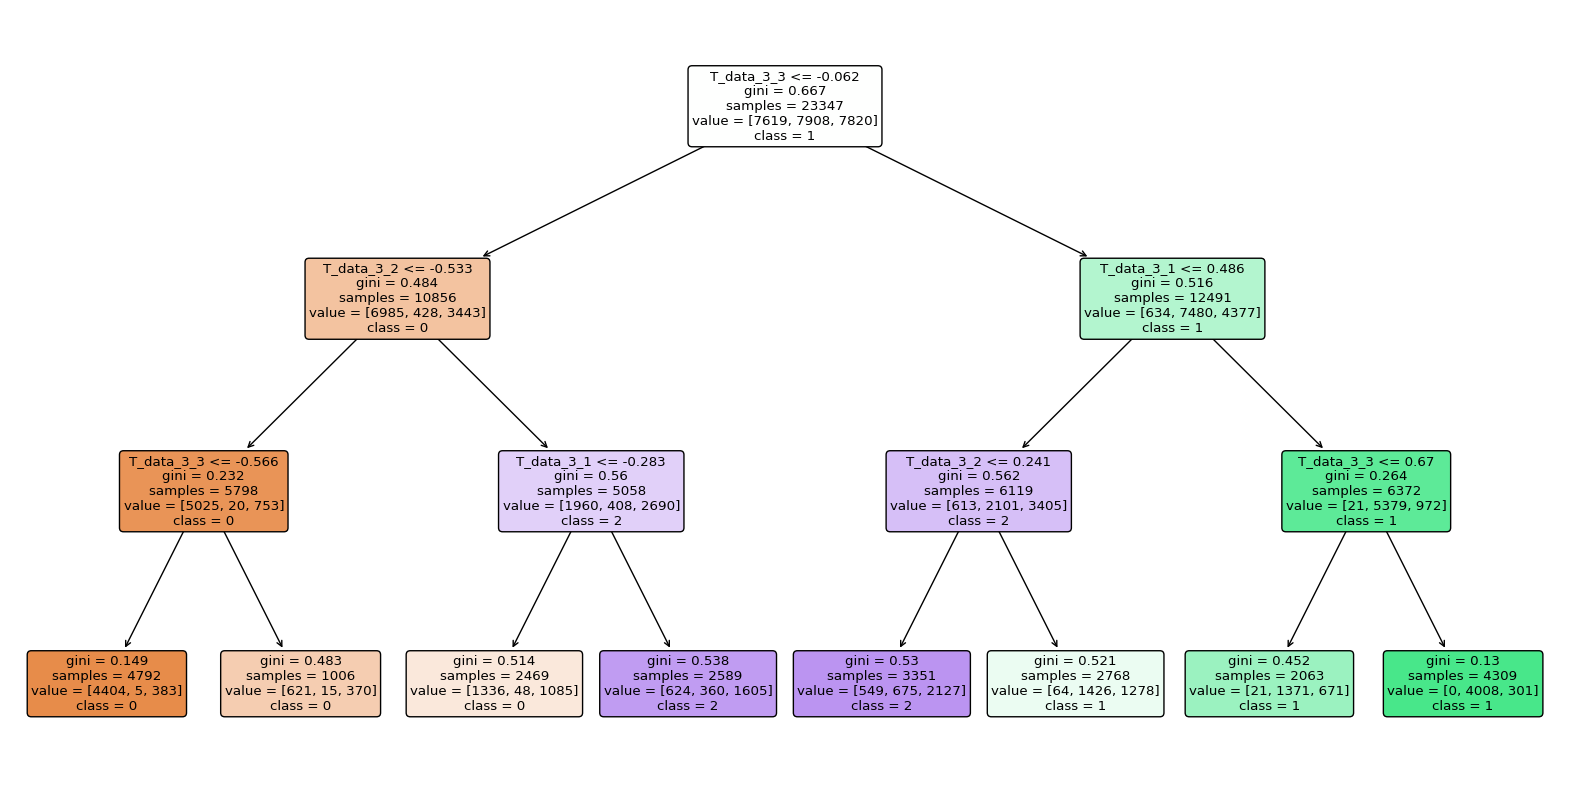

In [12]:
jvm.start()
# Tạo và huấn luyện mô hình J48 (Decision Tree)
print("Loading ARFF data...")
loader = Loader(classname="weka.core.converters.ArffLoader")
train_data = loader.load_file("train.arff")
test_data = loader.load_file("test.arff")

# Đặt class attribute (thuộc tính mục tiêu)
train_data.class_index = train_data.num_attributes - 1
test_data.class_index = test_data.num_attributes - 1

# Tạo và huấn luyện mô hình J48
print("Training J48 model...")
j48 = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.25", "-M", "2"])
j48.build_classifier(train_data)

# Đánh giá mô hình
print("\nEvaluating J48 model...")
eval = Evaluation(train_data)
eval.test_model(j48, test_data)  # Sử dụng test_model thay vì evaluate_model

# In kết quả đánh giá
print("\nEvaluation Results:")
print("Correctly Classified Instances:", eval.correct)
print("Incorrectly Classified Instances:", eval.incorrect)
print("Accuracy:", eval.percent_correct)
print("\nConfusion Matrix:")
print(eval.confusion_matrix)

# Hiển thị cây quyết định
print("\nDecision Tree Structure:")
print(j48)

# Lưu cây quyết định vào file
with open("j48_tree.txt", "w") as f:
    f.write(str(j48))
print("\nDecision tree saved to j48_tree.txt")

# Vẽ biểu đồ cây quyết định
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Chuyển đổi dữ liệu ARFF sang định dạng numpy
def arff_to_numpy(arff_data):
    X = np.zeros((arff_data.num_instances, arff_data.num_attributes - 1))
    y = np.zeros(arff_data.num_instances)
    
    for i in range(arff_data.num_instances):
        instance = arff_data.get_instance(i)
        for j in range(arff_data.num_attributes - 1):
            X[i, j] = instance.get_value(j)
        y[i] = instance.get_value(arff_data.num_attributes - 1)
    
    return X, y

X_train, y_train = arff_to_numpy(train_data)

# Tạo và huấn luyện mô hình Decision Tree của scikit-learn
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Vẽ cây quyết định
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree
plot_tree(dt, 
          feature_names=[train_data.attribute(i).name for i in range(train_data.num_attributes - 1)],
          class_names=[str(i) for i in range(int(max(y_train) + 1))],
          filled=True,
          rounded=True)
plt.savefig("j48_tree_visualization.png")
plt.show()

jvm.stop()


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\arpack_combined.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\core.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\mtj.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'c:\\Users\\Admin\\anaconda3\\envs\\pyspark_env\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


Loading ARFF data...

Training Random Forest model...

Visualizing first tree from Random Forest...


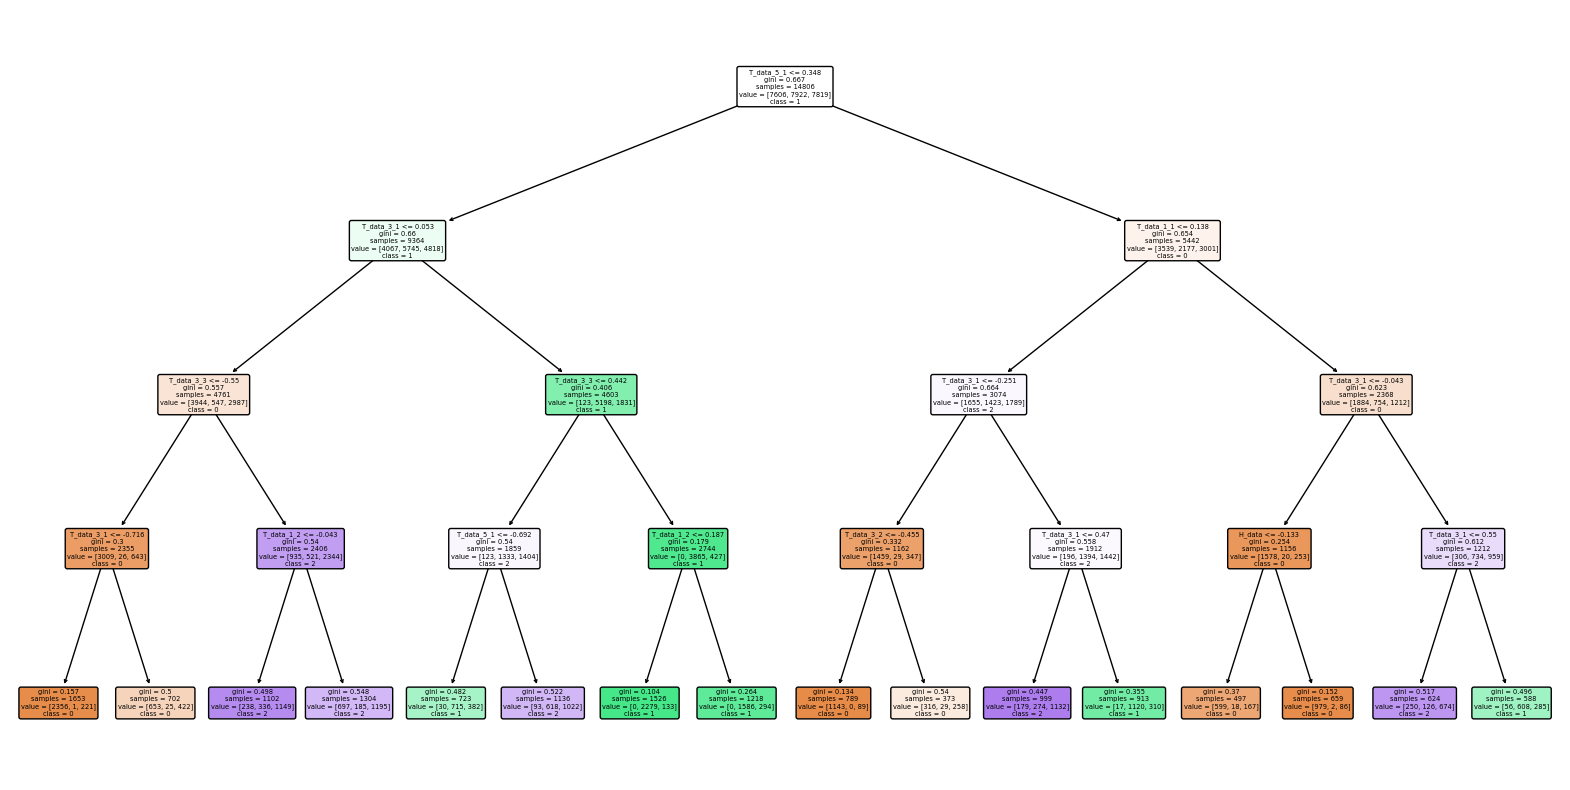


Random Forest Feature Importance:
       feature  importance
8   T_data_3_3    0.360154
6   T_data_3_1    0.331060
7   T_data_3_2    0.226909
12  T_data_5_1    0.016354
14  T_data_5_3    0.014800
13  T_data_5_2    0.012922
1   T_data_1_2    0.010281
0   T_data_1_1    0.009213
15      H_data    0.007817
2   T_data_1_3    0.005945


In [ ]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Hàm chuyển dữ liệu ARFF sang numpy
def arff_to_numpy(arff_data):
    X = np.zeros((arff_data.num_instances, arff_data.num_attributes - 1))
    y = np.zeros(arff_data.num_instances)
    
    for i in range(arff_data.num_instances):
        instance = arff_data.get_instance(i)
        for j in range(arff_data.num_attributes - 1):
            X[i, j] = instance.get_value(j)
        y[i] = instance.get_value(arff_data.num_attributes - 1)
    
    return X, y

# Khởi động JVM
jvm.start()

try:
    # Load dữ liệu
    print("Loading ARFF data...")
    loader = Loader(classname="weka.core.converters.ArffLoader")
    train_data = loader.load_file("train.arff")
    test_data = loader.load_file("test.arff")

    # Chuyển đổi dữ liệu
    X_train, y_train = arff_to_numpy(train_data)
    X_test, y_test = arff_to_numpy(test_data)

    # 1. Random Forest
    print("\nTraining Random Forest model...")
    rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
    rf.fit(X_train, y_train)

    # Vẽ cây đầu tiên của Random Forest
    plt.figure(figsize=(20,10))
    print("\nVisualizing first tree from Random Forest...")
    plot_tree(rf.estimators_[0], 
              feature_names=[train_data.attribute(i).name for i in range(train_data.num_attributes - 1)],
              class_names=[str(i) for i in range(int(max(y_train) + 1))],
              filled=True,
              rounded=True)
    plt.savefig("random_forest_tree_depth4.png")
    plt.show()

    # In feature importance của Random Forest
    print("\nRandom Forest Feature Importance:")
    feature_importance = pd.DataFrame({
        'feature': [train_data.attribute(i).name for i in range(train_data.num_attributes - 1)],
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    print(feature_importance.head(10))

finally:
    # Tắt JVM khi xong
    jvm.stop()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Các chỉ số đánh giá
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 
           'Kappa', 'MAE', 'RMSE', 'RAE (%)', 'RRSE (%)']

# Giá trị tương ứng cho mỗi mô hình
random_forest_scores = [85.51, 0.8547, 0.8544, 0.8551, 0.7826, 0.1621, 0.267, 36.4728, 56.6533]
adaboost_scores       = [82.18, 0.8216, 0.8215, 0.8218, 0.7327, 0.1181, 0.3294, 26.5815, 69.8787]


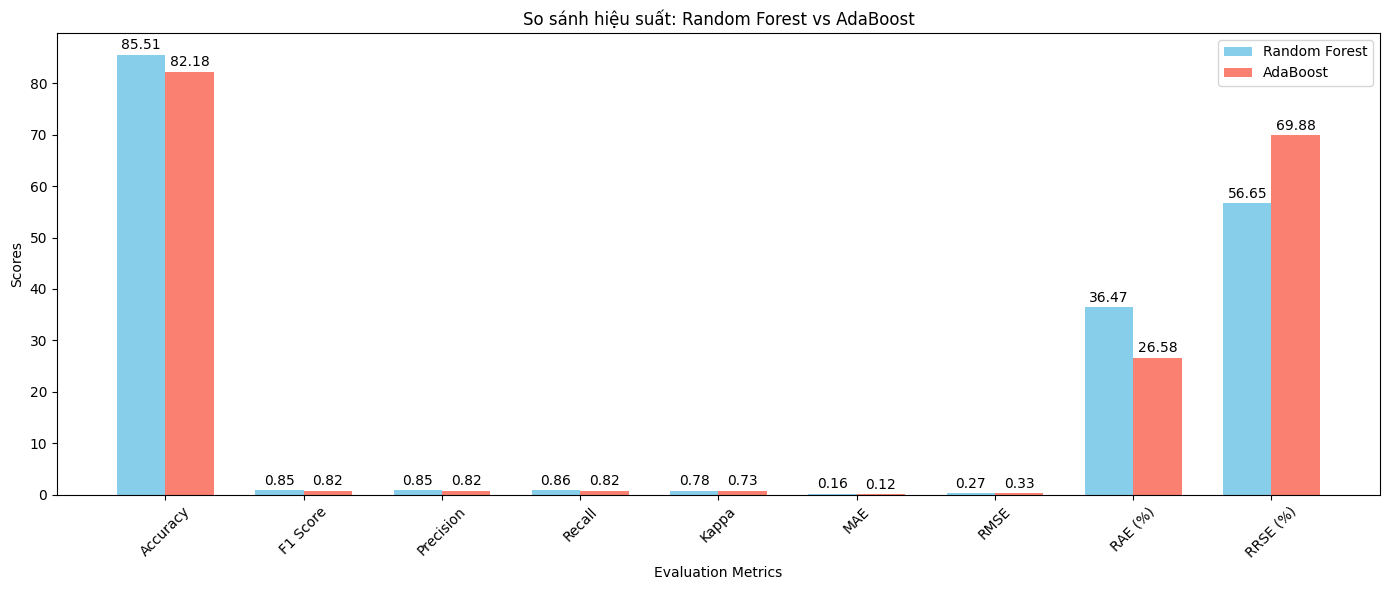

In [ ]:
# Thiết lập vị trí các cột
x = np.arange(len(metrics))  # Vị trí các chỉ số
width = 0.35  # Độ rộng của cột

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, random_forest_scores, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, adaboost_scores, width, label='AdaBoost', color='salmon')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('So sánh hiệu suất: Random Forest vs AdaBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

# Hiển thị giá trị trên mỗi cột
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


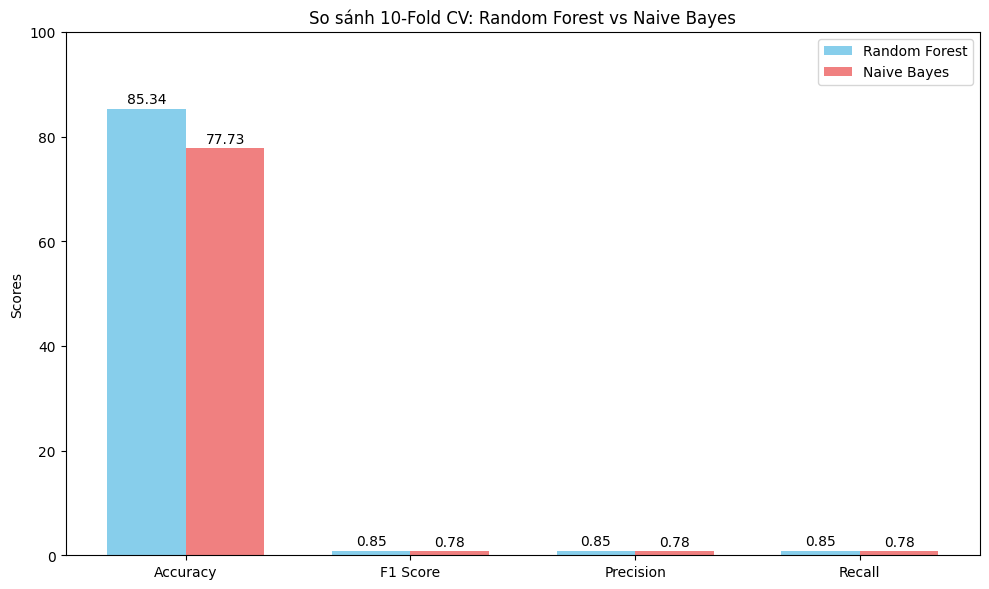

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tên các chỉ số đánh giá
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Giá trị tương ứng cho mỗi mô hình
random_forest = [85.34, 0.8536, 0.8539, 0.8534]
naive_bayes   = [77.73, 0.7782, 0.7794, 0.7773]

# Vị trí cột
x = np.arange(len(metrics))
width = 0.35

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, random_forest, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, naive_bayes, width, label='Naive Bayes', color='lightcoral')

# Gán nhãn
ax.set_ylabel('Scores')
ax.set_title('So sánh 10-Fold CV: Random Forest vs Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Hiển thị giá trị trên mỗi cột
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.ylim(0, 100)  # Đặt giới hạn cho trục y (vì Accuracy dùng %)
plt.tight_layout()
plt.show()


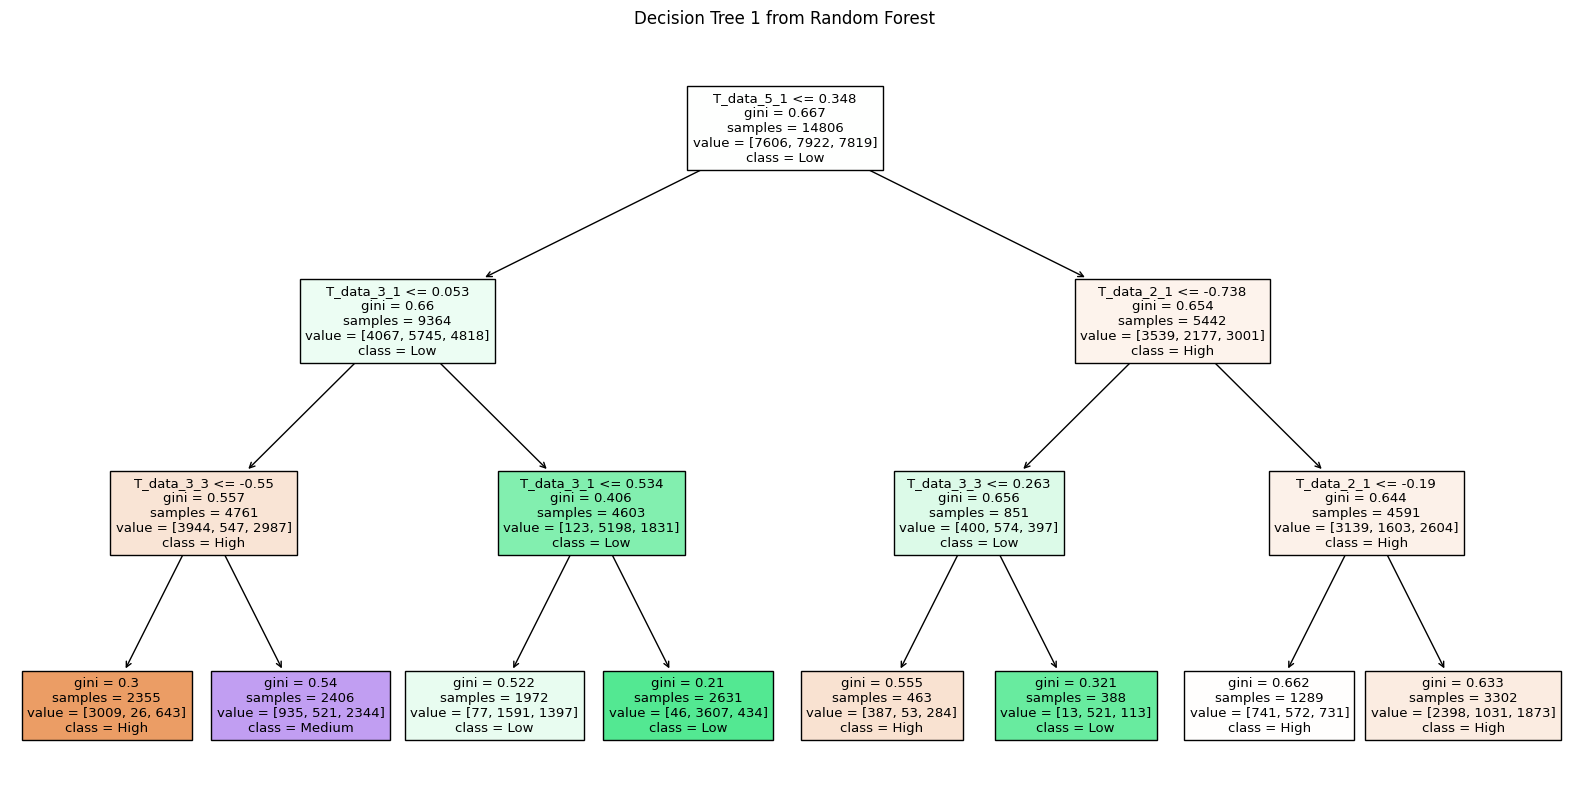

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
train_df = pd.read_csv('train_temp.csv')
test_df = pd.read_csv('test_temp.csv')

# 2. Tách đặc trưng và nhãn
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']

X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# 3. Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Vẽ cây quyết định đầu tiên
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=[str(c) for c in rf_model.classes_],
          filled=True)
plt.title("Decision Tree 1 from Random Forest")
plt.savefig("DecisionTree Random Forest.png")
plt.show()



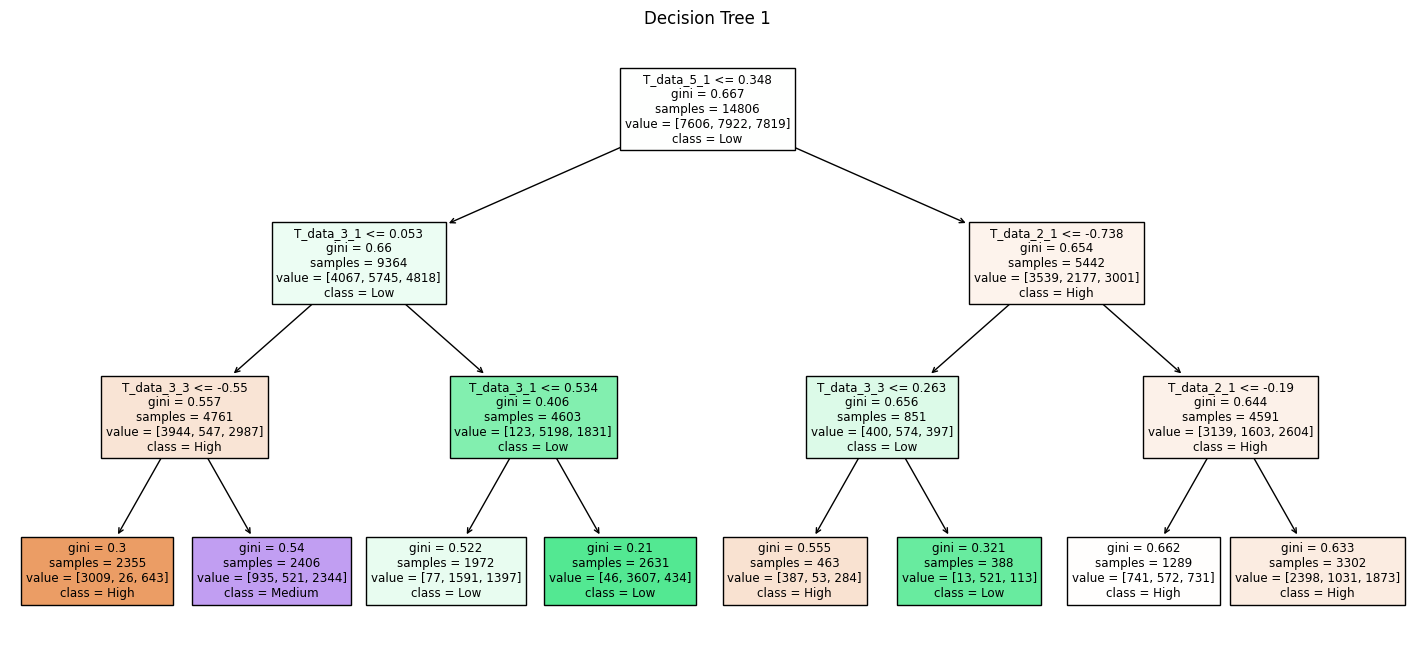

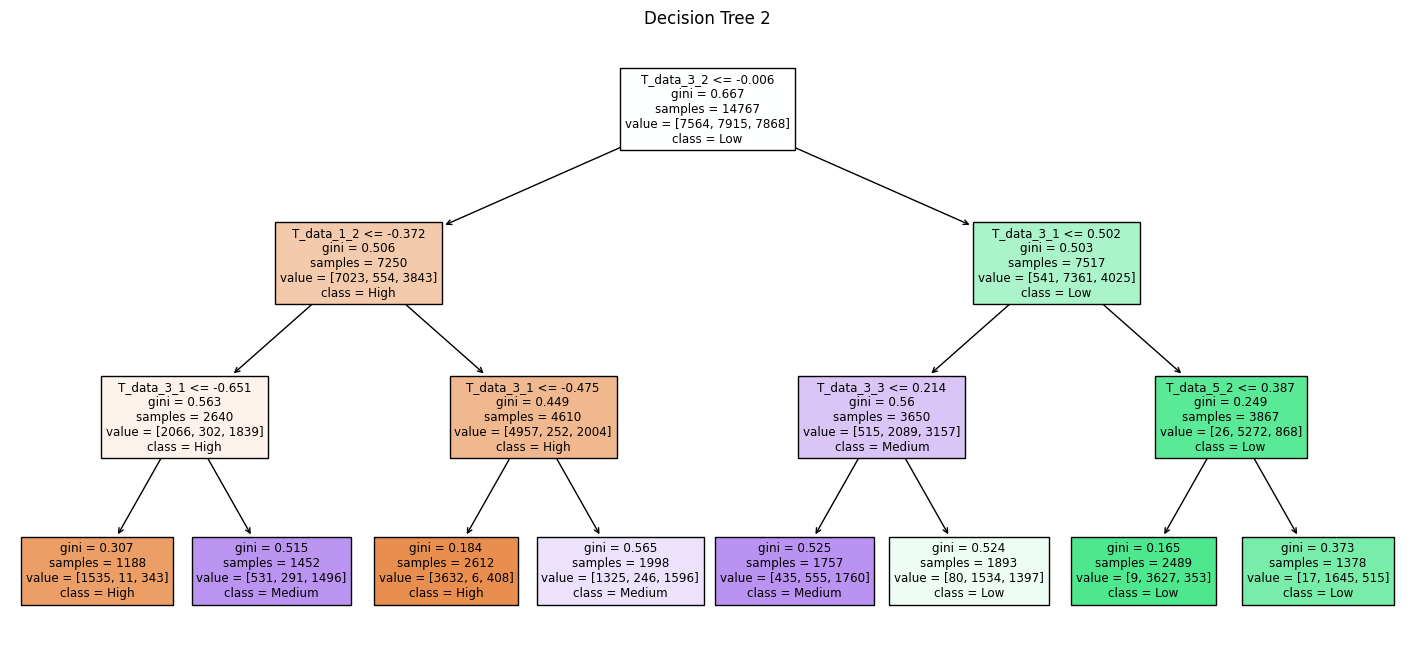

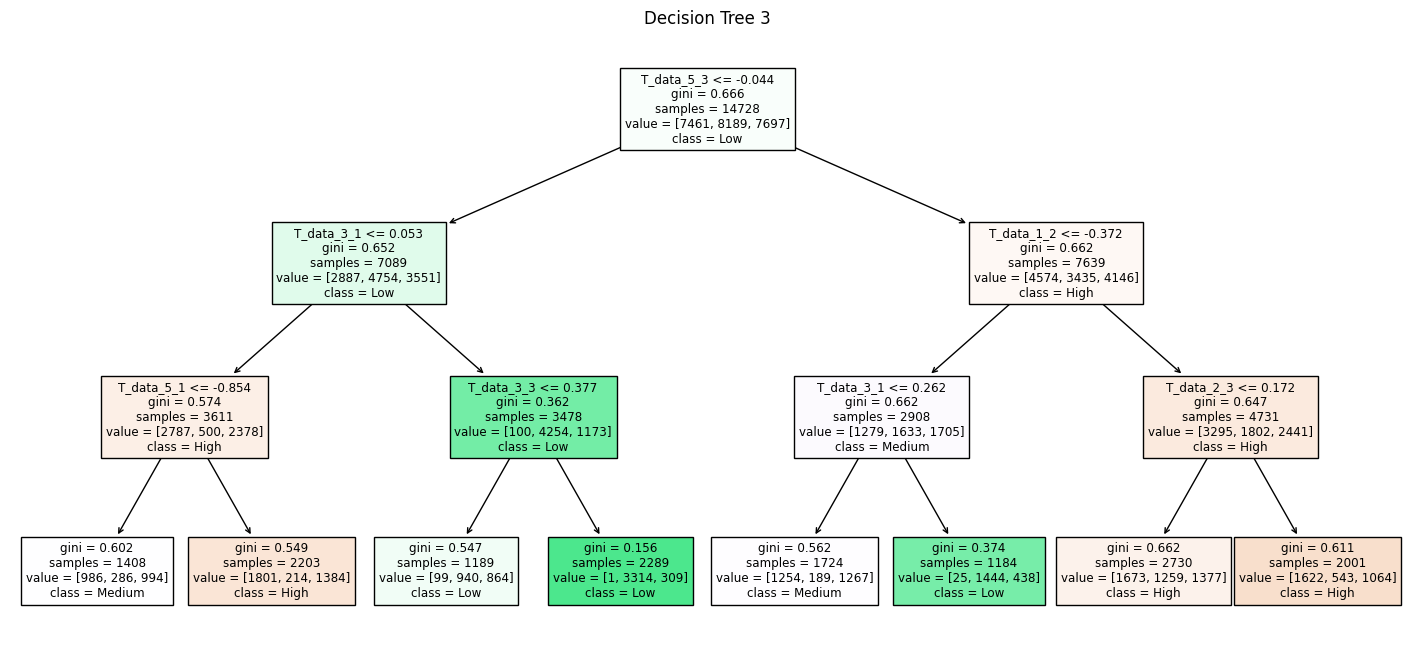

In [ ]:
for i in range(len(rf_model.estimators_)):
    plt.figure(figsize=(18, 8))
    plot_tree(rf_model.estimators_[i],
              feature_names=X_train.columns,
              class_names=[str(c) for c in rf_model.classes_],
              filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

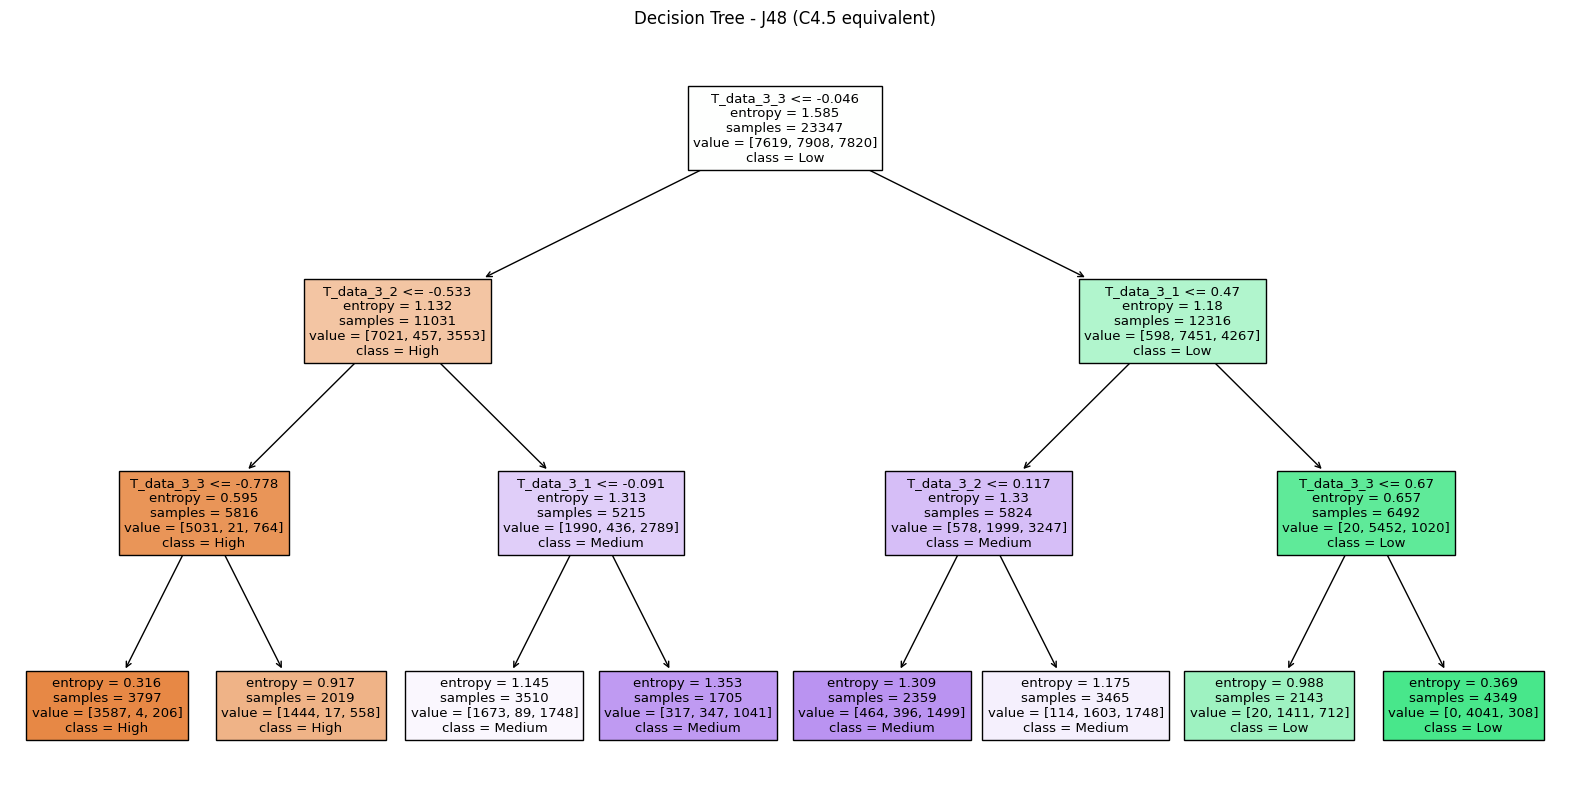

c:\Users\Admin\anaconda3\envs\pyspark_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


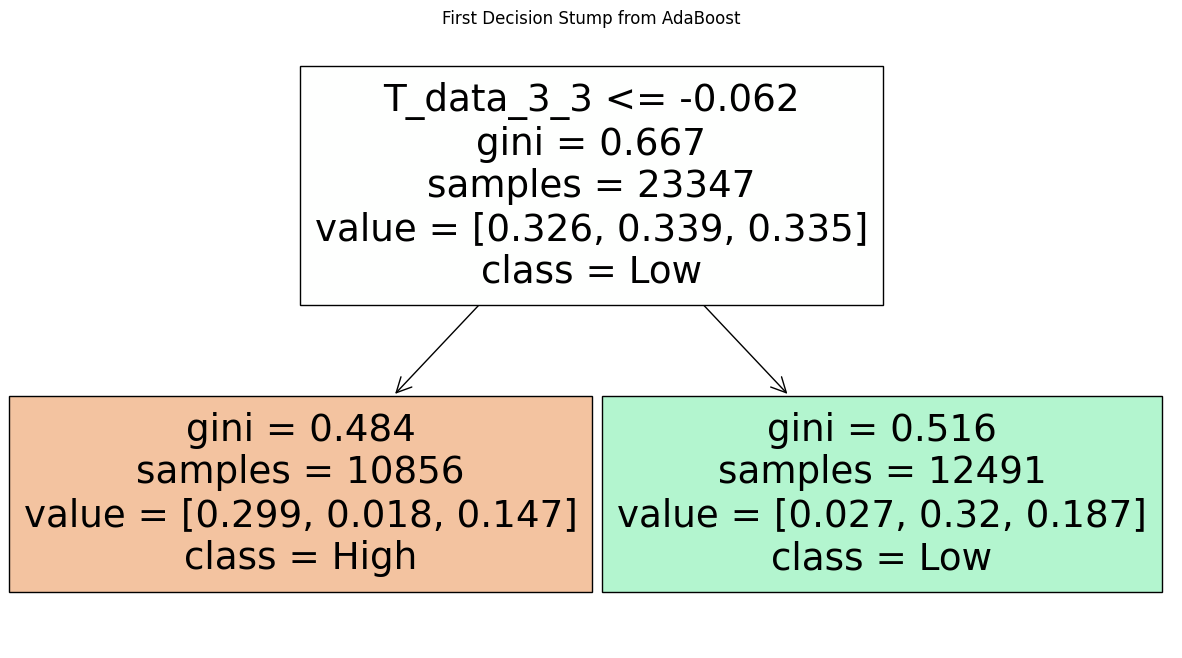

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
train_df = pd.read_csv('train_temp.csv')
test_df = pd.read_csv('test_temp.csv')

X_train = train_df.drop('class', axis=1)
y_train = train_df['class']

# 2. J48 (tương đương Decision Tree dùng entropy)
j48_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
j48_model.fit(X_train, y_train)

# Vẽ cây quyết định cho J48
plt.figure(figsize=(20, 10))
plot_tree(j48_model,
          feature_names=X_train.columns,
          class_names=[str(c) for c in j48_model.classes_],
          filled=True)
plt.title("Decision Tree - J48 (C4.5 equivalent)")
plt.show()

# 3. AdaBoost (dùng cây quyết định nông làm base estimator)
ada_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # cây đơn giản
    n_estimators=10,
    random_state=42)
ada_model.fit(X_train, y_train)

# Vẽ cây đầu tiên trong AdaBoost
plt.figure(figsize=(15, 8))
plot_tree(ada_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=[str(c) for c in ada_model.classes_],
          filled=True)
plt.title("First Decision Stump from AdaBoost")
plt.show()
